<a href="https://colab.research.google.com/github/hungry4therock/Colab/blob/main/5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
내용: 파이썬 데이터분석 실습하기
"""
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [10]:
#데이터 불러오기
df_koweps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/koweps_2015.csv', encoding='cp949')
df_koweps

,Unnamed: 0,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,h10_flag,p10_wgl,p10_wsl,p10_wgc,p10_wsc,h10_hc,nh1001_1,nh1001_2,h1001_1,h10_pind,h10_pid,h10_g1,h10_g2,h10_g3,h10_g4,h10_g6,h10_g7,h10_g8,h10_g9,h10_g10,h10_g11,h10_g12,h1001_110,h1001_5aq1,h1001_5aq2,h1001_5aq3,h1001_5aq4,h10_med1,h10_med2,...,c1005_4aq7,c1005_4aq8,c1005_4aq9,c1005_4aq10,c1005_4aq11,c1005_4aq12,c1005_4aq13,c1005_4aq14,c1005_4aq15,c1007_4aq1,c1007_4aq2,c1007_7aq1,c1007_7aq2,c1007_7aq3,c1007_4aq3,c1007_4aq4,c1007_4aq5,c1007_4aq6,c1007_4aq7,c1007_4aq8,c1007_4aq9,c1007_4aq10,c1007_4aq11,c1007_4aq12,c1007_4aq13,c1007_4aq14,c1007_4aq15,c1007_4aq16,c1007_4aq17,c1007_4aq18,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
0,1,1,1,1,10101,0.0,NaN,1,1,864.0,864.0,0,776.994676,0.256780,763.718940,0.252392,2,NaN,NaN,1,1,101,1,10,2,1936,2,0,0,0,2,2,1,1,0,0,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2,2,1,1,20101,0.0,NaN,1,1,600.0,600.0,0,959.645799,0.317142,949.229127,0.313699,2,NaN,NaN,1,1,201,1,10,2,1945,4,5,0,0,2,2,1,1,0,0,0,0,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,3,3,1,1,30101,0.0,NaN,1,1,1571.0,1619.0,0,1059.155878,0.350028,1047.659052,0.346228,1,NaN,NaN,1,1,301,1,10,1,1948,3,5,0,0,2,2,1,1,0,0,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,0.0,NaN
3,4,4,1,1,40101,0.0,NaN,1,1,3579.0,3687.0,0,1012.159859,0.334496,991.572052,0.327693,1,NaN,NaN,2,1,401,1,10,1,1942,7,3,0,0,3,1,1,5,0,0,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2400.0,NaN,0.0,NaN
4,5,4,1,1,40101,0.0,NaN,1,1,3579.0,3687.0,0,1075.421227,0.355403,1057.046575,0.349330,1,NaN,NaN,2,4,402,2,2,2,1923,2,0,0,0,2,1,1,5,0,0,0,0,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,16660,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,536.438289,0.177281,525.204519,0.173568,1,NaN,NaN,6,7,980002,2,20,2,1967,5,5,0,0,1,1,1,5,0,0,0,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
16660,16661,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,687.109009,0.227074,679.650644,0.224609,1,NaN,NaN,6,7,980003,3,11,2,1992,5,5,0,0,5,1,1,5,0,0,0,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3630.0,NaN,NaN,0.0,NaN
16661,16662,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,1262.031602,0.417073,1248.332620,0.412546,1,NaN,NaN,6,7,980004,4,12,1,1995,5,5,0,0,5,1,1,5,0,0,0,0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,NaN,0.0,NaN
16662,16663,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,578.446752,0.191164,572.167883,0.189089,1,NaN,NaN,6,7,980005,5,13,2,1998,5,1,0,0,0,1,1,5,0,0,0,0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


df_reg1 count : 2486
df_reg2 count : 3711
df_reg3 count : 2785
df_reg4 count : 2036
df_reg5 count : 1467
df_reg6 count : 1257
df_reg7 count : 2922


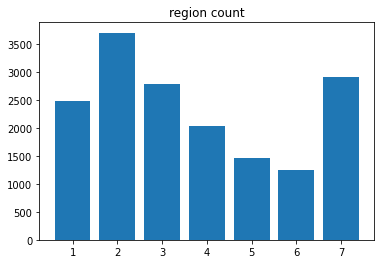

In [11]:
#지역별 인구수 분석(지역컬럼 : h10_reg7)
#1:서울, 2:경기/인천, 3:부산/경남, 4:대구/경북, 5:대전/충남, 6:강원/충북, 7:광주/전남/전북/제주

df_reg1 = df_koweps[df_koweps.h10_reg7 == 1].h10_reg7
df_reg2 = df_koweps[df_koweps.h10_reg7 == 2].h10_reg7
df_reg3 = df_koweps[df_koweps.h10_reg7 == 3].h10_reg7
df_reg4 = df_koweps[df_koweps.h10_reg7 == 4].h10_reg7
df_reg5 = df_koweps[df_koweps.h10_reg7 == 5].h10_reg7
df_reg6 = df_koweps[df_koweps.h10_reg7 == 6].h10_reg7
df_reg7 = df_koweps[df_koweps.h10_reg7 == 7].h10_reg7

print('df_reg1 count :', df_reg1.count())
print('df_reg2 count :', df_reg2.count())
print('df_reg3 count :', df_reg3.count())
print('df_reg4 count :', df_reg4.count())
print('df_reg5 count :', df_reg5.count())
print('df_reg6 count :', df_reg6.count())
print('df_reg7 count :', df_reg7.count())

#그래프 출력
plt.title('region count')
plt.bar(['1', '2', '3', '4', '5', '6', '7'], [df_reg1.count(), 
                                              df_reg2.count(),
                                              df_reg3.count(),
                                              df_reg4.count(),
                                              df_reg5.count(),
                                              df_reg6.count(),
                                              df_reg7.count()])
plt.show()

0 세대 :  265
10세대 :  1589
20세대 :  1813
30세대 :  1366
40세대 :  2106
50세대 :  2183
60세대 :  2060
70세대 :  2306
80세대 :  2411
90세대 :  529


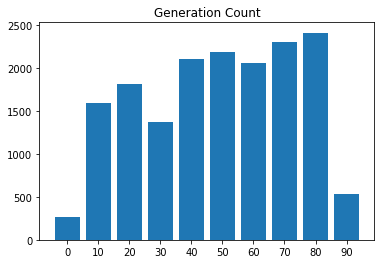

In [12]:
#나이대별 데이터분석(나이컬럼 : h10_g4)
df_age = df_koweps.loc[:, ['h10_g4', 'h10_g11']]


df_age['age'] = 2021 - df_age.h10_g4

df_age.loc[(df_age.age >=  0) & (df_age.age < 10), 'gen'] = 0
df_age.loc[(df_age.age >= 10) & (df_age.age < 20), 'gen'] = 10
df_age.loc[(df_age.age >= 20) & (df_age.age < 30), 'gen'] = 20
df_age.loc[(df_age.age >= 30) & (df_age.age < 40), 'gen'] = 30
df_age.loc[(df_age.age >= 40) & (df_age.age < 50), 'gen'] = 40
df_age.loc[(df_age.age >= 50) & (df_age.age < 60), 'gen'] = 50
df_age.loc[(df_age.age >= 60) & (df_age.age < 70), 'gen'] = 60
df_age.loc[(df_age.age >= 70) & (df_age.age < 80), 'gen'] = 70
df_age.loc[(df_age.age >= 80) & (df_age.age < 90), 'gen'] = 80
df_age.loc[(df_age.age >= 90) & (df_age.age < 100), 'gen'] = 90

generations = []

for i in range(10):
  count = df_age[df_age.gen == (i * 10)].gen.count()
  generations.append(count)

print('0 세대 : ', generations[0])
print('10세대 : ', generations[1])
print('20세대 : ', generations[2])
print('30세대 : ', generations[3])
print('40세대 : ', generations[4])
print('50세대 : ', generations[5])
print('60세대 : ', generations[6])
print('70세대 : ', generations[7])
print('80세대 : ', generations[8])
print('90세대 : ', generations[9])

#그래프 출력
plt.title('Generation Count')
plt.bar(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90'], generations)
plt.show()

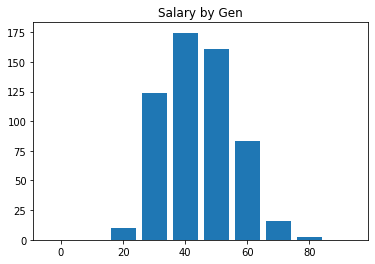

In [13]:
# 나이대 별 소득 분포(소득컬럼 : p1002_8aq1)
df_income = df_koweps.loc[:, ['h10_g3', 'h10_g4', 'h10_eco9', 'p1002_8aq1']]

df_income.columns = ['gender', 'birth', 'job', 'salary']

df_income = df_income.fillna(0)

df_income['age'] = 2021 - df_income.birth

for i in range(0, 100, 10):
  begin = i
  end = i + 10
  df_income.loc[(df_income.age >= begin) & (df_income.age < end), 'gen'] = i

df_income_mean = df_income.groupby('gen')['salary'].mean().reset_index()
df_income_mean

#그래프 출력
plt.title('Salary by Gen')
plt.bar(df_income_mean.gen, df_income_mean.salary, width=8)
plt.show()